In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.metrics import pairwise

In [3]:
customers = pd.read_csv(r"C:\Users\pothu\OneDrive\Desktop\zeotap\Customers.csv")
products = pd.read_csv(r"C:\Users\pothu\OneDrive\Desktop\zeotap\Products.csv")
transactions = pd.read_csv(r"C:\Users\pothu\OneDrive\Desktop\zeotap\Transactions.csv")

# CUSTOMERS

In [5]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [7]:
customers.shape

(200, 4)

In [9]:
customers.isna().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [13]:
customers.duplicated().sum()

0

In [15]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [19]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [21]:
region_counts = customers['Region'].value_counts()

In [23]:
customers['Year'] = customers['SignupDate'].dt.year
signups_by_year = customers['Year'].value_counts().sort_index()

In [25]:
customers['Month'] = customers['SignupDate'].dt.month
signups_by_month = customers.groupby('Month').size()

In [27]:
first_signup_date = customers['SignupDate'].min()

In [29]:
print("Regional Distribution of Customers:")
print(region_counts)

Regional Distribution of Customers:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [33]:
print("\nSignup Trends by Year:")
print(signups_by_year)


Signup Trends by Year:
Year
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [35]:
print("\nSignup Trends by Month:")
print(signups_by_month)


Signup Trends by Month:
Month
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
dtype: int64


In [37]:
print("\nFirst Signup Date:")
print(first_signup_date)


First Signup Date:
2022-01-22 00:00:00


In [39]:
segmentation = customers.groupby(['Region', 'Year']).size().unstack().fillna(0)
print("Customer Segmentation by Region and Year:")
segmentation

Customer Segmentation by Region and Year:


Year,2022,2023,2024
Region,,,
Asia,13,16,16
Europe,16,19,15
North America,10,8,28
South America,25,14,20


In [41]:
customers['Quarter'] = customers['SignupDate'].dt.to_period('Q')
signups_by_quarter = customers['Quarter'].value_counts().sort_index()
print("\nSignup Trends by Quarter:")
signups_by_quarter


Signup Trends by Quarter:


Quarter
2022Q1    16
2022Q2    21
2022Q3    14
2022Q4    13
2023Q1    19
2023Q2    12
2023Q3     9
2023Q4    17
2024Q1    21
2024Q2    20
2024Q3    21
2024Q4    17
Freq: Q-DEC, Name: count, dtype: int64

In [43]:
regional_trends = customers.groupby(['Year', 'Region']).size().reset_index(name='Count')
print("\nRegional Signup Trends Over Time:")
regional_trends


Regional Signup Trends Over Time:


,Year,Region,Count
0,2022,Asia,13
1,2022,Europe,16
2,2022,North America,10
3,2022,South America,25
4,2023,Asia,16
5,2023,Europe,19
6,2023,North America,8
7,2023,South America,14
8,2024,Asia,16
9,2024,Europe,15


C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\2935515182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis', order=customers['Region'].value_counts().index)


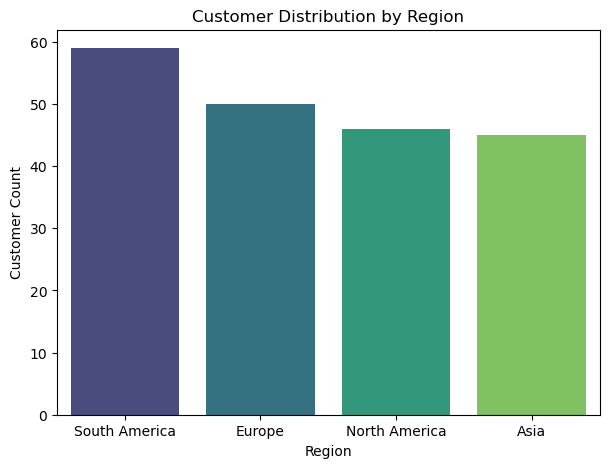

In [47]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Region', data=customers, palette='viridis', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.show()

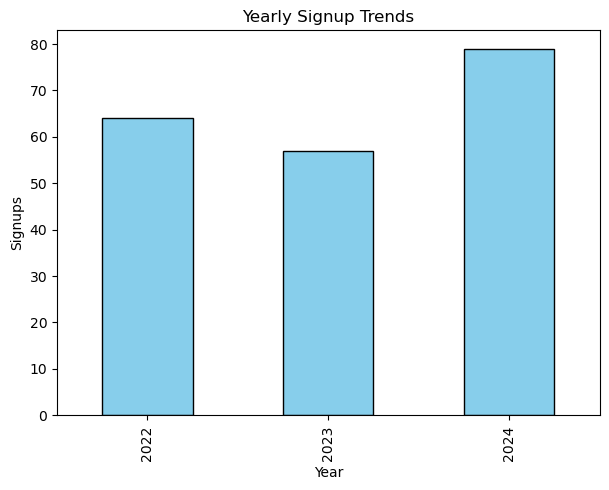

In [63]:
plt.figure(figsize=(7, 5))
signups_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Yearly Signup Trends')
plt.xlabel('Year')
plt.ylabel('Signups')
plt.show()

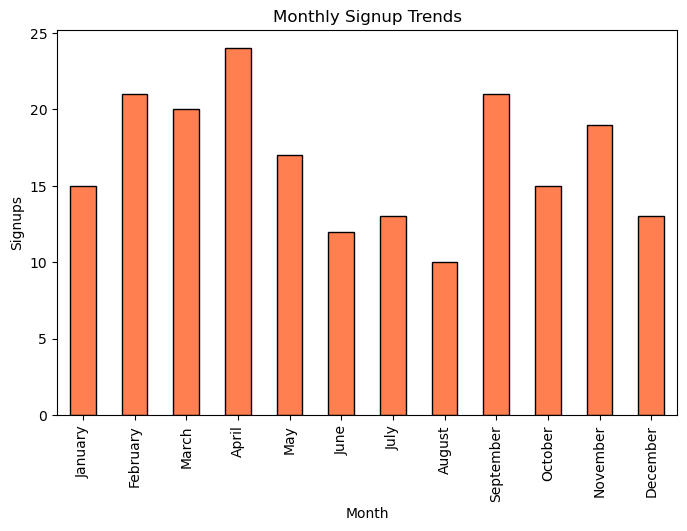

In [65]:
plt.figure(figsize=(8, 5))
signups_by_month.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Monthly Signup Trends')
plt.xlabel('Month')
plt.ylabel('Signups')
plt.xticks(range(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

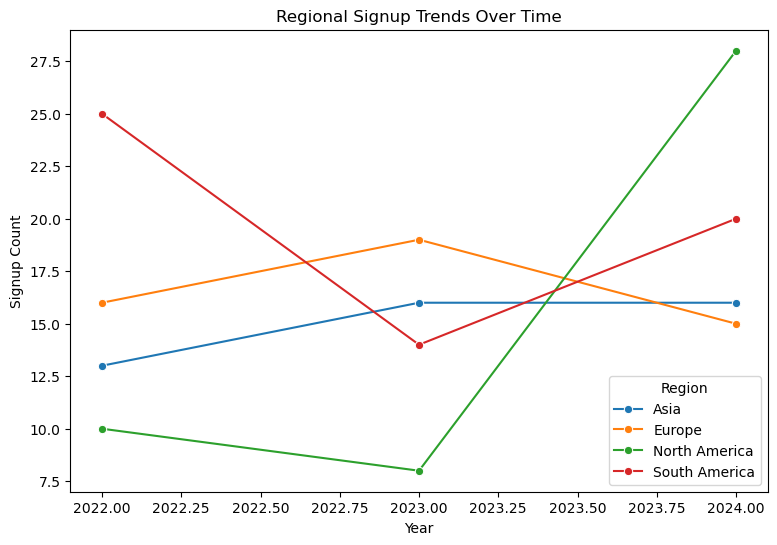

In [67]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=regional_trends, x='Year', y='Count', hue='Region', marker='o', palette='tab10')
plt.title('Regional Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Signup Count')
plt.legend(title='Region')
plt.show()

In [69]:
high_signup_months = signups_by_month[signups_by_month > signups_by_month.mean() + signups_by_month.std()]
print("\nMonths with Significantly High Signups:")
high_signup_months


Months with Significantly High Signups:


Month
4    24
dtype: int64

# PRODUCTS

In [71]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [73]:
products.shape

(100, 4)

In [79]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [81]:
products.isna().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [85]:
products.duplicated().sum()

0

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\1965798911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='viridis')


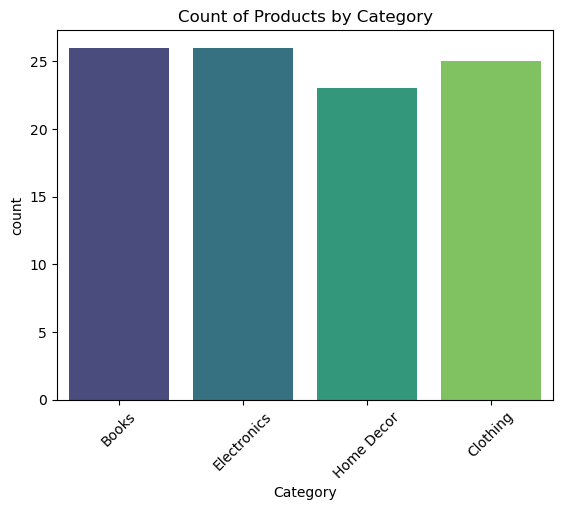

In [130]:
sns.countplot(data=products, x='Category', palette='viridis')
plt.title('Count of Products by Category')
plt.xticks(rotation=45)
plt.show()

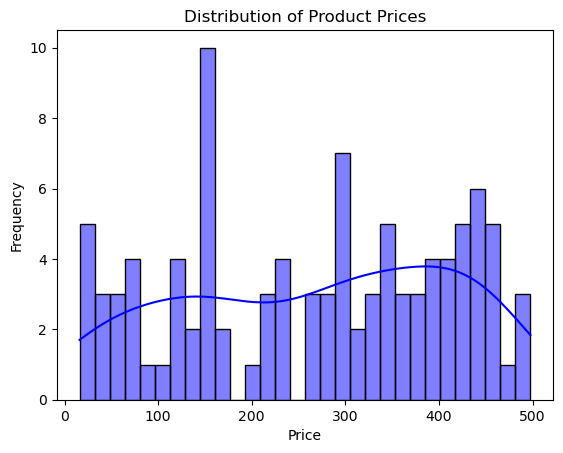

In [134]:
sns.histplot(products['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\4277074489.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=products, x='Category', y='Price', palette='Set2')


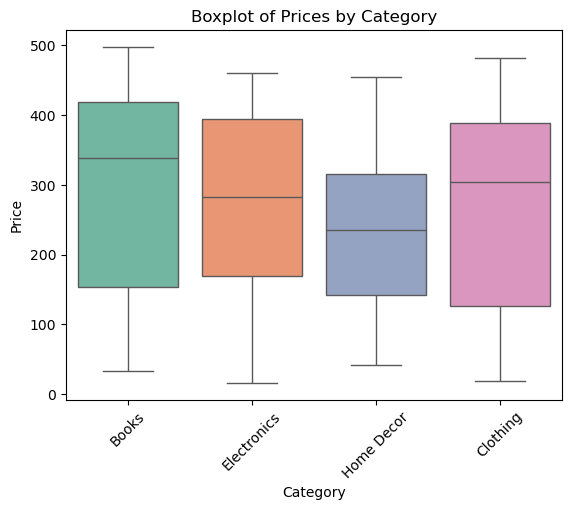

In [138]:
sns.boxplot(data=products, x='Category', y='Price', palette='Set2')
plt.title('Boxplot of Prices by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\1115450699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_expensive, x='Price', y='ProductName', palette='plasma')


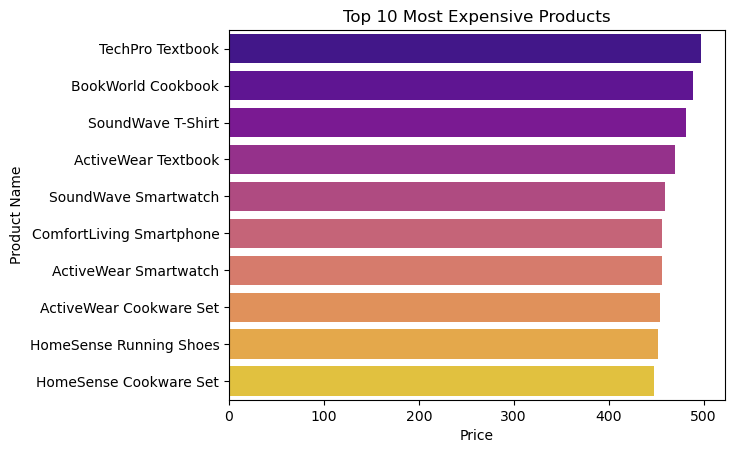

In [140]:
top_expensive = products.nlargest(10, 'Price')
sns.barplot(data=top_expensive, x='Price', y='ProductName', palette='plasma')
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.show()

In [146]:
products['PriceRange'] = pd.cut(products['Price'], bins=[0, 100, 200, 300, 400, 500, 600], 
                             labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500+'])

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\3827782809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='PriceRange', palette='pastel')


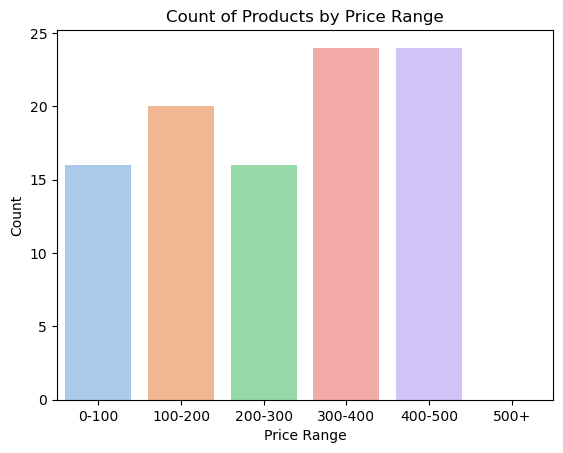

In [148]:
sns.countplot(data=products, x='PriceRange', palette='pastel')
plt.title('Count of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\1295217196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_category, x='Category', y='Price', palette='mako')


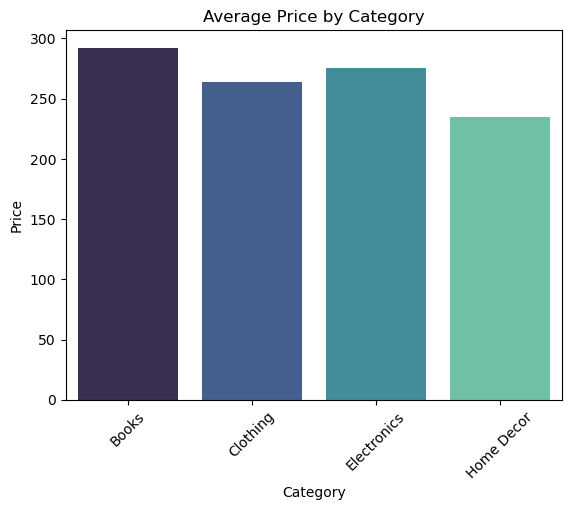

In [150]:
avg_price_by_category = products.groupby('Category')['Price'].mean().reset_index()
sns.barplot(data=avg_price_by_category, x='Category', y='Price', palette='mako')
plt.title('Average Price by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\1412233497.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=products, x='Category', y='Price', palette='muted')


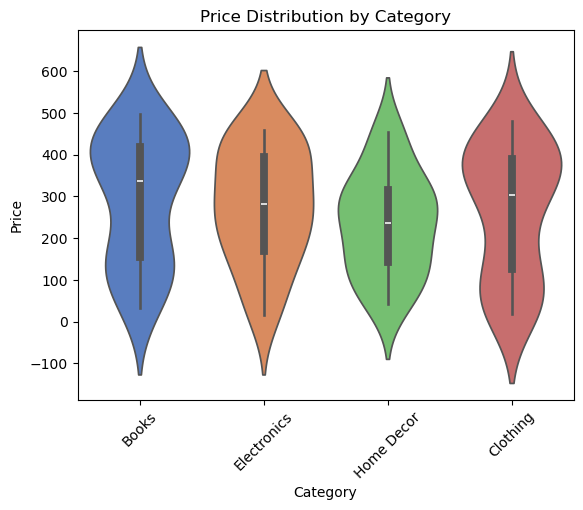

In [152]:
sns.violinplot(data=products, x='Category', y='Price', palette='muted')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\821797140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_expensive_data, x='Category', palette='rocket')


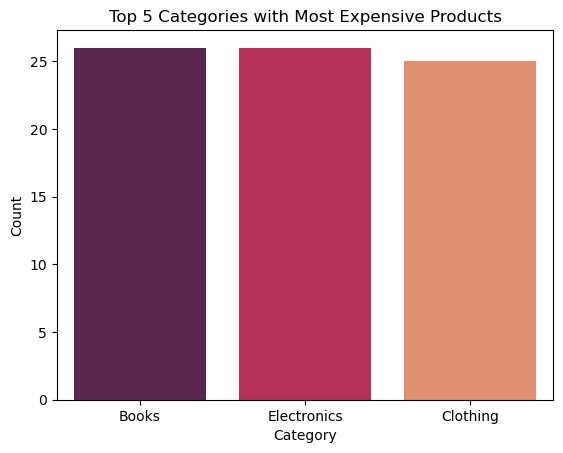

In [154]:
top_expensive_categories = products.nlargest(5, 'Price')['Category'].unique()
top_expensive_data = products[products['Category'].isin(top_expensive_categories)]
sns.countplot(data=top_expensive_data, x='Category', palette='rocket')
plt.title('Top 5 Categories with Most Expensive Products')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\1293984472.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_trend = products.groupby(['PriceRange', 'Category']).size().unstack()


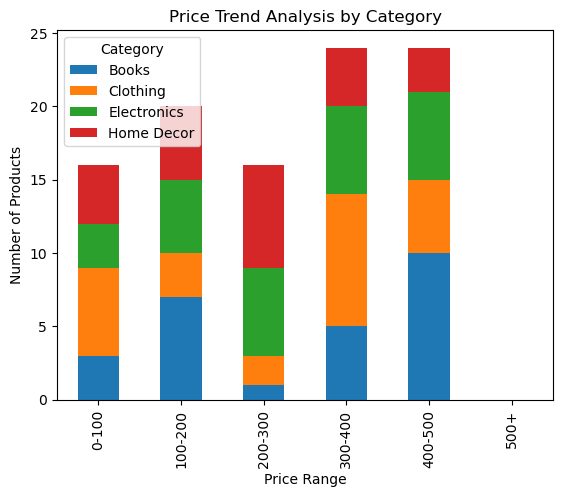

In [156]:
price_trend = products.groupby(['PriceRange', 'Category']).size().unstack()
price_trend.plot(kind='bar', stacked=True)
plt.title('Price Trend Analysis by Category')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.legend(title='Category')
plt.show()

# TRANSACTION

In [88]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [90]:
transactions.shape

(1000, 7)

In [92]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [94]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [96]:
transactions.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [98]:
transactions.duplicated().sum()

0

In [100]:
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)

In [102]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

In [106]:
quantity_distribution = transactions['Quantity'].value_counts()

In [108]:
correlation_matrix = transactions[['Price', 'Quantity', 'TotalValue']].corr()

Text(0.5, 0, 'Product ID')

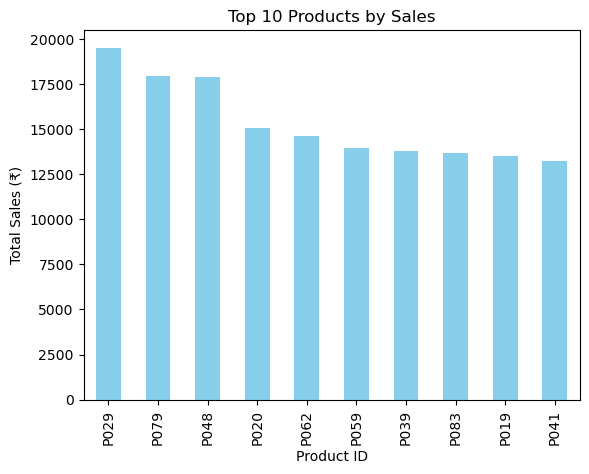

In [116]:
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Product ID')

Text(0.5, 0, 'Customer ID')

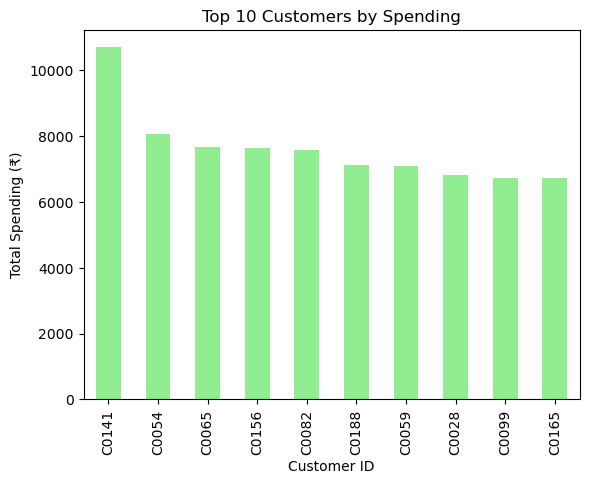

In [118]:
customer_spending.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Customers by Spending')
plt.ylabel('Total Spending (₹)')
plt.xlabel('Customer ID')

C:\Users\pothu\AppData\Local\Temp\ipykernel_14424\1234352191.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(transactions['Quantity'], palette='viridis')


Text(0, 0.5, 'Frequency')

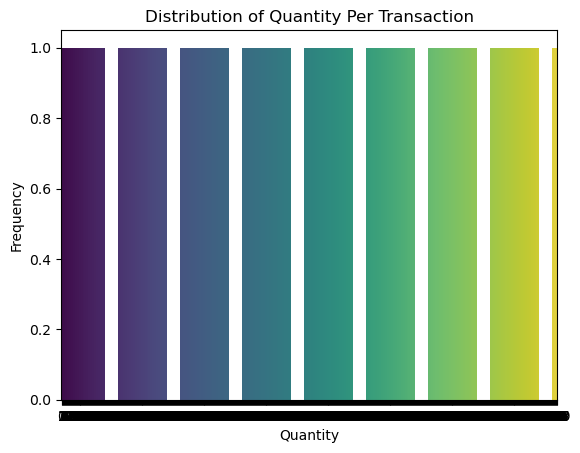

In [120]:
sns.countplot(transactions['Quantity'], palette='viridis')
plt.title('Distribution of Quantity Per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Correlation Heatmap')

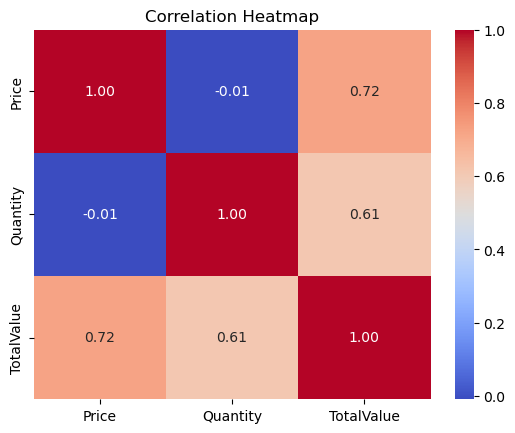

In [122]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

In [124]:
business_insights = {
    "Top 10 Products by Sales": product_sales,
    "Top 10 Customers by Spending": customer_spending,
    "Quantity Distribution": quantity_distribution,
    "Correlation Matrix": correlation_matrix,
}
business_insights

{'Top 10 Products by Sales': ProductID
 P029    19513.80
 P079    17946.91
 P048    17905.20
 P020    15060.92
 P062    14592.24
 P059    13947.20
 P039    13778.88
 P083    13671.60
 P019    13487.95
 P041    13232.12
 Name: TotalValue, dtype: float64,
 'Top 10 Customers by Spending': CustomerID
 C0141    10673.87
 C0054     8040.39
 C0065     7663.70
 C0156     7634.45
 C0082     7572.91
 C0188     7111.32
 C0059     7073.28
 C0028     6819.57
 C0099     6715.72
 C0165     6708.10
 Name: TotalValue, dtype: float64,
 'Quantity Distribution': Quantity
 4    261
 3    254
 2    246
 1    239
 Name: count, dtype: int64,
 'Correlation Matrix':                Price  Quantity  TotalValue
 Price       1.000000 -0.009378    0.722714
 Quantity   -0.009378  1.000000    0.609972
 TotalValue  0.722714  0.609972    1.000000}